In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('..\\data\\interim\\regularized.csv', parse_dates=True, infer_datetime_format=True, index_col=0)
data.drop(['Month', 'Time'], axis=1, inplace=True)
stats = data.describe()
stats.loc['IQR'] = (stats.loc['75%'] - stats.loc['25%'])
stats.loc['low'] = stats.loc['25%'] - (1.5 * stats.loc['IQR'])
stats.loc['high'] = stats.loc['75%'] + (1.5 * stats.loc['IQR'])
stats.loc['outliers'] = (stats.loc['min'] < stats.loc['low']) | (stats.loc['max'] > stats.loc['high'])
stats.loc['outliers'] = (stats.loc['outliers']).map(bool)
stats

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa)
count,43824,43824,43824,43824,43824,43824,43824
mean,0.573066,0.610588,0.636734,0.59652,0.205269,0.273036,0.535555
std,0.186322,0.191065,0.19144,0.280408,0.116612,0.0662406,0.133814
min,0,0,0,0,0,0,0
25%,0.434641,0.475265,0.5,0.388889,0.1125,0.299379,0.451049
50%,0.576797,0.616608,0.651163,0.666667,0.1875,0.299379,0.538462
75%,0.730392,0.770318,0.77907,0.833333,0.275,0.299379,0.622378
max,1,1,1,1,1,1,1
IQR,0.295752,0.295053,0.27907,0.444444,0.1625,0,0.171329
low,-0.00898693,0.0326855,0.0813953,-0.277778,-0.13125,0.299379,0.194056


In [6]:
# Drop Visibility column because data is predominantly the same value and thus the feature is uninformative
data.pop('Visibility (km)');

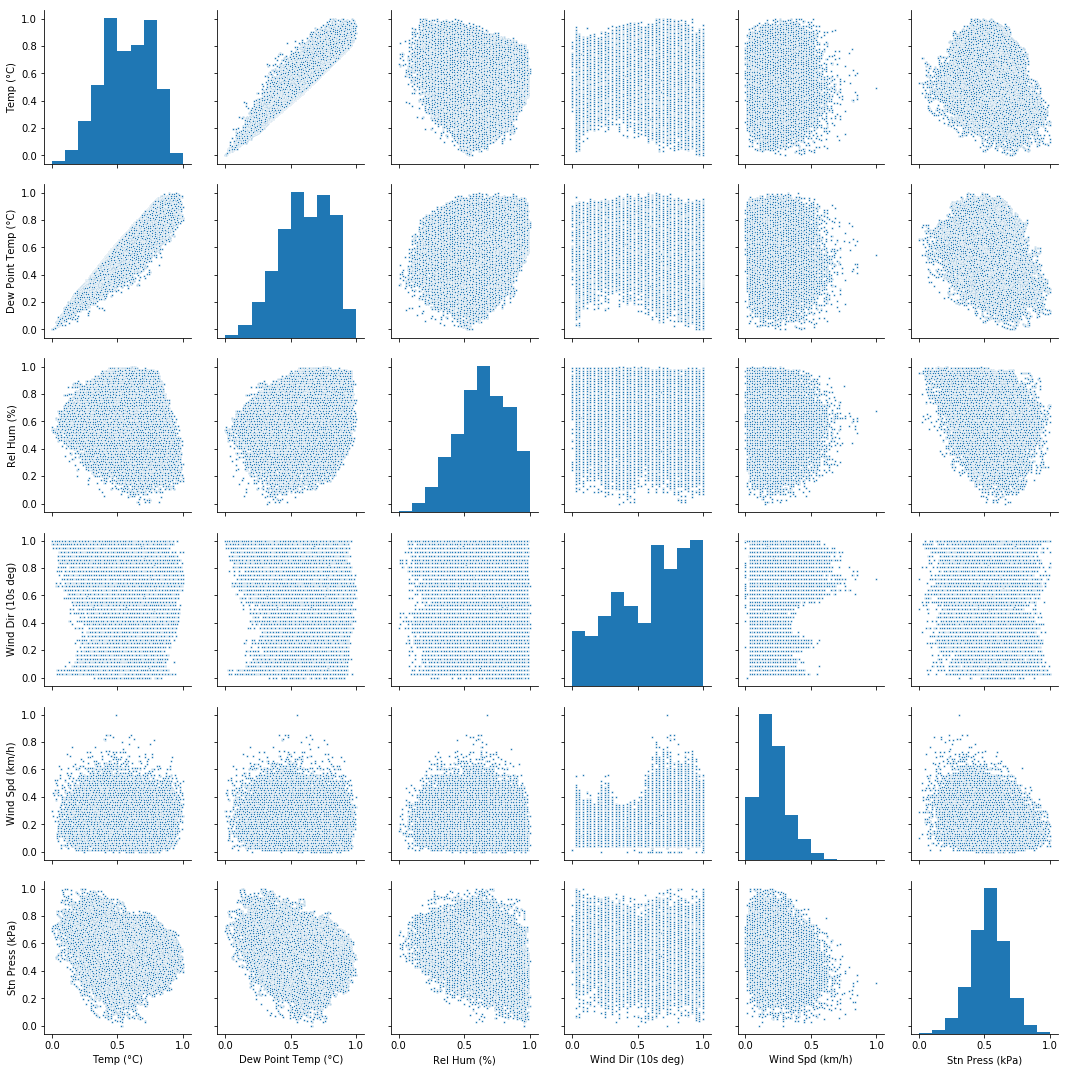

In [7]:
sns.pairplot(data, plot_kws={"s":6})
plt.show()

In [8]:
# Examine the correlation of features
data.corr()

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Stn Press (kPa)
Temp (°C),1.000000,0.935176,-0.175934,-0.099376,-0.145737,-0.199613
Dew Point Temp (°C),0.935176,1.000000,0.177781,-0.125077,-0.220599,-0.283575
Rel Hum (%),-0.175934,0.177781,1.000000,-0.090743,-0.221801,-0.254726
Wind Dir (10s deg),-0.099376,-0.125077,-0.090743,1.000000,0.265732,-0.067362
Wind Spd (km/h),-0.145737,-0.220599,-0.221801,0.265732,1.000000,-0.266084
Stn Press (kPa),-0.199613,-0.283575,-0.254726,-0.067362,-0.266084,1.000000
